## 552 Quiz 2

## Lecture 5 - Confidence intervals based on the assumption of normality or the Central Limit Theorem

### 1. Explain the Central Limit Theorem and its role in constructing confidence intervals.

#### 1.1. What is Central Limit Theorem?
- If certain conditions are met, the sampling distribution of a certain point estimates/sample statistics (e.g., sample mean, sample proportion) will:
    - be normally distributed
    - have a mean equal to the population parameter
    - have SE proportional to the inverse of the square root of the sample size

#### 1.2. CLT conditions
1. All types of sample statistics need to be **independent**.
2. The **sample size** must be sufficiently large, such that $np ≥ 10$ and $n(1-p) ≥ 10$
3. If the sample is small (n < 30), the sample observations should come from a **normally distributed population**
    - We can relax this condition more and more for larger and larger sample sizes (n > 30)

#### 1.3. Inference methods based on CLT
- Estimation: calculating the confidence interval of the parameter of interest (e.g., mean, proportion)
    - Confidence interval?
    - We know that our estimate will probably not perfectly match the value of population parameter we are interested in estimating
    - so confidence intervals let us provide **a range where we are fairly confident that the population parameter value should lie**.


- Hypothesis testing: calculating the test statistic, number of standard errors away from the null value the observed sample statistic is (Z for proportions, T for means)

### 2. Describe a normal distribution.

#### 2.1. CLT and normal distribution

- The central limit theorem states that is certain assumptions are met, **the sampling distribution of an estimate follows a normal distribution**.
- So we can start our process of generating/approximating the sampling distribution of a sample estimate using the standard normal distribution.


> Normal distributions are important in statistics and are often used in the natural and social sciences to represent real-valued random variables whose distributions are not known. Their importance is partly due to the central limit theorem. It states that, under some conditions, the average of many samples (observations) of a random variable with finite mean and variance is itself a random variable—whose distribution converges to a normal distribution as the number of samples increases. Therefore, physical quantities that are expected to be the sum of many independent processes, such as measurement errors, often have distributions that are nearly normal.

#### 2.2. Transforming the standard normal distribution

![](https://calculushowto.com/wp-content/uploads/2019/08/standard-normal-distribution.jpg)

- We use the normal distribution as a base, and use the point estimate and the standard error to estimate the confidence interval using the percentile method on this distribution.
- $\mu$ = our point estimate
- $\sigma$ = sample's standard deviation divided by the square root of our sample size (from CLT)<br>
    ==> we could use the percentile method to get the confidence interval upper and lower bounds using these two information!

### 3. Write a computer script to calculate confidence intervals based on the assumption of normality or the Central Limit Theorem.

#### 3.1. Equation for confidence intervals using the central limit theorem

$$\text{confidence interval} = \mu (\text{point estimate}) ± Z * SE$$

1. Find the exact values for the quantiles you are interested in from a normal distribution with mean 0 and sd = 1

* Example: 95% confidence interval

In [3]:
qnorm(0.025)
qnorm(0.975)

[1] -1.959964

[1] 1.959964

2. Plug these value in for $Z$ in the confidence interval equation

$$\text{95% confidence interval} = \mu ± 1.96 * SE$$

#### 3.2. Example: Click through rate

In [9]:
library(readr)
library(tidyverse)
click_through <- read_csv("data/click_through.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  webpage = col_character(),
  click_target = col_double()
)




**1. Check whether we can use CLT to calculate confidence intervals here**


- Independence: The experimenters used Google Analytics to **randomly serve up** the different versions of the websites to people visiting the website.
- Sample size: sufficiently large

In [10]:
click_through %>% 
    group_by(webpage) %>% 
    summarize(prop = sum(click_target) / n(),
              successes = prop * n(),
              failures = n() * (1 - prop))

`summarise()` ungrouping output (override with `.groups` argument)



webpage,prop,successes,failures
<chr>,<dbl>,<dbl>,<dbl>
Interact,0.02847709,69,2354
Services,0.04849885,63,1236


**2. Calculate the standard error ($SE$)**


**General case**
- $SE = \frac{\hat{\sigma}}{\sqrt{n}}$
    - ${\hat{\sigma}}$: sample standard deviation
    - $n$: the number of observations in our sample


**For Proportion**
- $SE = \sqrt{\frac{\hat{p} (1-\hat{p})}{n}}$

In [11]:
click_through_est <- click_through %>% 
    group_by(webpage) %>% 
    summarize(click_rate = sum(click_target) / n(),
             n = n()) %>% 
    mutate(se = sqrt(click_rate*(1 - click_rate) / n ))
click_through_est

`summarise()` ungrouping output (override with `.groups` argument)



webpage,click_rate,n,se
<chr>,<dbl>,<int>,<dbl>
Interact,0.02847709,2423,0.003379074
Services,0.04849885,1299,0.005960268


**3. Calculate 95% confidence intervals**

In [12]:
click_through_est %>% 
    mutate(lower_95 = click_rate - (1.96 * se),
          upper_95 = click_rate + (1.96 * se))

webpage,click_rate,n,se,lower_95,upper_95
<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Interact,0.02847709,2423,0.003379074,0.02185411,0.03510008
Services,0.04849885,1299,0.005960268,0.03681672,0.06018097


### 4. Discuss the potential limitations of these methods.

#### 4.1. CLT vs Bootstrapping

- CLT uses mathematically defined distributions instead of simulating them
- For confidence intervals we are using mathematical shortcuts to calculate the plausible range instead of just reading the values off the boostrap distribution

#### 4.2. CLT limitations
- If speed doesn’t matter, and you don’t violate any of the conditions of the CLT, then you can use a simulation-based approach (like bootstrapping) or CLT and you will get essentially the same result.
- If speed matters and you don’t violate any of the conditions of the CLT, then you might want to use asymptotic theory for statistical inference.
- If you are violating the conditions of the CLT then you might want to use simulation-based approaches. But remember, there is no free lunch! If your sample size is really small, simulation-based approaches will give you an answer but it won’t be a very accurate one.

## Lecture 6 - Classical Tests Based on Normal and t-distributions

### 1. Use results from the assumption of normality or the Central Limit Theorem to perform hypothesis testing.

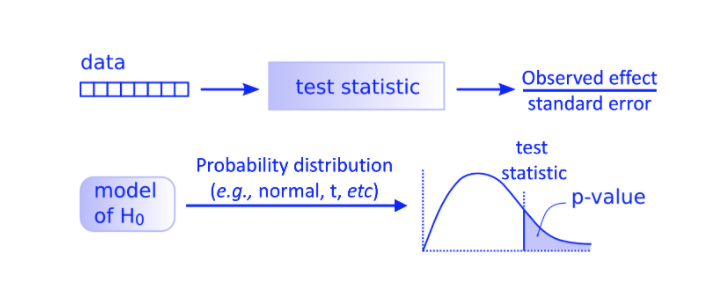

- When we use this method, the distribution we use as the model of the null hypothesis is a probability distribution. 
    - For example, a normal distribution when we are testing for a difference in proportions.
    - A t-distribution when we are testing for a difference in means.

- This means that the **variance of from the data** is not represented in the distribution we use as the model of the null hypothesis, so instead it is represented in the **test statistic**.

### 2. Write a computer script to perform hypothesis testing based on results from the assumption of normality or the Central Limit Theorem.

#### 2.1. Hypothesis testing for click-through rate without `prop.test`

**1. Define test statistic for two-proportions z-test, $Z$**

$$Z = \frac{\hat{p_1} - \hat{p_2}}{\sqrt{\hat{p} (1 - \hat{p})(\frac{1}{n_1} + \frac{1}{n_2})}}$$

where $\hat{p}$ is the proportions of the successes combined:
    $$\hat{p} = \frac{Y_1 + Y_2}{n_1 + n_2}$$

- The numerator of the 𝑍 test statistic encodes your two sample statistics, and is the **effect size** (difference in proportions).
- The demoninator of the 𝑍 test statistic encodes the **standard errors** of the two samples (reflecting the sample size and sample variability).
    - Thus if you have a **large effect** (difference in proportion) and/or a **small standard error** (driven by a large sample size and/or small sample variation) you will get a large 𝑍 test statistic.

**2. Calculate $\hat{p_{1}}$, $n1$, $\hat{p_{2}}$, $n2$**

In [18]:
# Calculate p1(hat), n1, p2(hat), n2
p_services <- click_through %>% 
    filter(webpage == "Services") %>% 
    summarize(click_rate = sum(click_target) / n()) %>% 
    pull()

n_services <- click_through %>% 
    filter(webpage == "Services") %>%
    nrow()

p_interact <- click_through %>% 
    filter(webpage == "Interact") %>% 
    summarize(click_rate = sum(click_target) / n()) %>% 
    pull()

n_interact <- click_through %>% 
    filter(webpage == "Interact") %>%
    nrow()

**3. Calculate $\hat{p}$**

In [19]:
# calculate phat
phat <- click_through %>% 
    summarise(phat = sum(click_target) / n()) %>%    # success combined divided by the observation size
    pull()

**4. Calculate Z, our sample statistic**

In [20]:
z <- ((p_services - p_interact) / (sqrt(phat * (1 - phat) * (1/n_services + 1/n_interact))))
z

[1] 3.148019

- Here, $Z \sim N(mean = 0, \sigma = 1)$

**5. Compare thresholds and our sample statistic**

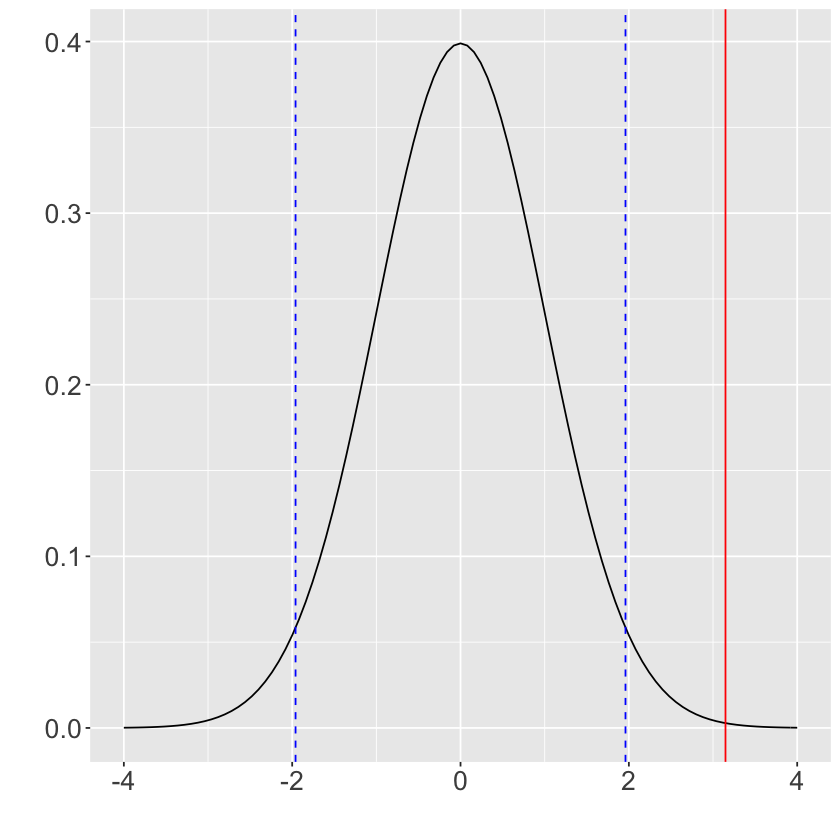

In [23]:
z_norm <- ggplot(data = data.frame(x = c(-4, 4)), aes(x)) +
  stat_function(fun = dnorm, n = 101, args = list(mean = 0, sd = 1)) +
  ylab("") + xlab("") + 
  theme(text = element_text(size=20)) + 
  geom_vline(xintercept = c(qnorm(0.025), qnorm(0.975)), 
                     color = "blue", lty = 2) +
    geom_vline(xintercept = z, color = "red")
z_norm

In [24]:
# calculate p-value using pnorm
p_value <- pnorm(- abs(z)) + pnorm(abs(z), lower.tail = FALSE)
p_value

[1] 0.001643811

#### 2.2. Hypothesis testing for click-through rate with `prop.test`

In [25]:
# calculate success number and n

click_summary <- click_through %>% 
    group_by(webpage) %>% 
    summarize(success = sum(click_target),
             n = n())
click_summary

`summarise()` ungrouping output (override with `.groups` argument)



webpage,success,n
<chr>,<dbl>,<int>
Interact,69,2423
Services,63,1299


In [27]:
# then do prop.test
library(broom)
click_summary

prop.test(click_summary$success, click_summary$n, 
          correct = FALSE, alternative = c("two.sided")) %>%
    tidy()

webpage,success,n
<chr>,<dbl>,<int>
Interact,69,2423
Services,63,1299


estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
0.02847709,0.04849885,9.910023,0.001643811,1,-0.03345043,-0.006593075,2-sample test for equality of proportions without continuity correction,two.sided


- `prop.test` in R formally calculates the **chi-square test** under the hood
- Even though sample statistic is different from the result with $Z$ sample statistic above, it returns the same p-value



### 3. Discuss the potential limitations of these methods.

### 4. Compare and contrast the parts of hypothesis testing that differ between simulation- and resampling-based approaches with the assumption of normality or the Central Limit Theorem- based approaches.

- We are using mathematically defined distributions instead of simulating them
- For confidence intervals we are using mathematical shortcuts to calculate the plausible range instead of just reading the values off the boostrap distribution
- For hypothesis tests we are encoding the sample size in the test statistic instead of the distribution under the model of the null hypothesis

## Lecture 7

### 1. Choose your estimator (mean, median, proportion, quantile, etc) given an inferential question and the data at hand


#### 1.1. What varies between the different test flavours?
- estimator
- hypotheses
- test statistic
- distribution under the null hypothesis

#### 1.2. Proportion

- Data type: `categorical`
- Useful when we care about the relative frequency of something.
    - Ex) How often your favourite sports team wins relative to the other teams?

#### 1.3. Mean
- Data type: `quantitative`
- When our distribution is not skewed, and/or has long tail in one direction, the mean is a good estimate of the central tendency of a distribution
    - Ex) Where do most values occur?

#### 1.4. Median
- Data type: `quantitative`
- When our distribution is quite skewed, or has long tails, the mean estimate gets drawn out towards the tail. -> Choose median
- Not sensitive to extreme values

#### 1.5. Quantile
- Data type: `quantitative`
- When we are interested in estimating the tail regions of distributions, rather than the centre/core.
    - A device manufacturer may wish to know what are the 10% and 90% quantiles for some feature of the production process, so as to tailor the process to cover 80% of the devices produced.
    - For risk management and regulatory reporting purposes, a bank may need to estimate a lower bound on the changes in the value of its portfolio which will hold with high probability.
    - A pediatrician requires a growth chart for children given their age and perhaps even medical background, to help determine whether medical interventions are required, e.g. while monitoring the progress of a premature infant.



You need to really think deeply about what aspect of your distributions do you care about for the question you are asking, and then choose an estimator that does a decent job at describing that!

### 2. Craft hypotheses based on your question and estimator

#### 2.1. How to craft hypotheses?
- What is not interesting?
    - Null hypothesis
    - We almost always use an = sign here.
    - We specify that the parameter we are trying to estimate is **equal** to something (a value, or some other parameter).


- What is interesting?
    - Alternative hypothesis
    - We almost always do two-direction tests, and for those we specify that the parameter we are trying to estimate is **not equal** to something (a value, or some other parameter)
    - If we are interested in only one direction we use > or < to indicate this.

### 3. Choose a suitable test, based on your hypotheses and the data at hand (not getting into which are more powerful, more like, which tests would be suitable)

#### 3.1. How to choose a suitable test?

- Does the test work with the type of estimator I have chosen?
- Do I satisfy the test assumptions/conditions?

![](https://onishlab.colostate.edu/wp-content/uploads/2019/07/which_test_flowchart.png)

#### 3.2. Example

1. Question: In general, how often do data science graduates find jobs as machine learning engineers compared to computer science graduates?
- Data: Current job titles from a random survey of data science and computer science graduates.
- Estimator: Proportion
- Suitable test: test of independent proportions (`prop.test`)

2. Question: Is the high-end of data science salaries different from the high-end of data engineer salaries?
- Data: Quantitative values for salaries from a random survey of data science and data engineers. Sample distribution is quite skewed to the right.
- Estimator: A quantile. 
- Hypotheses
    - 𝐻0: 𝑄(0.9)data science salary = 𝑄(0.9)data engineer salary
    - 𝐻𝐴: 𝑄(0.9)data science salary≠𝑄(0.9)data engineer salary
- Suitable test: permutation test of independence, using difference of 90th percentile as the test statistic

## Lecture 8

### 1. Identify the sources of randomness in hypothesis testing.

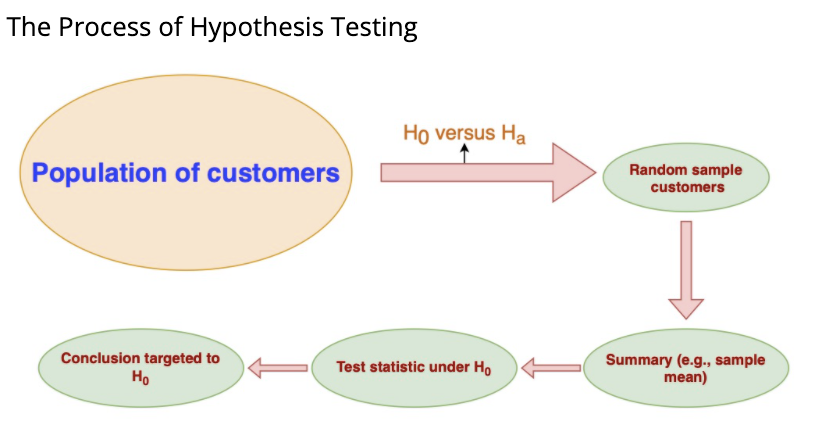

### 2. Connect these sources to the existence of errors in inference.

- Except for the hypotheses, all elements in green involve randomness in our hypothesis testing.
- Hence, we are at risk of committing errors due to these randomness.
    - This is something embedded in hypothesis testing.
    - Therefore, we have to take into these errors (they are probabilities).

### 3. Define the two types of errors in hypothesis testing: I and II.

| $H_0$: The population click-through-rate for the two versions of the website is equal | $H_0$ is true | $H_0$ is not true |
|---------------------------------------------------------------------------------------|---------------|-------------------|
| Fail to reject $H_0$                                                                | Correct       | Type II Error     |
| Reject $H_0$                                                                          | Type I Error  | Correct           |

#### 3.1. Type I Error (False positive)
- $\alpha$: significance level
- We reject $H_0$ when it is true for the population
- This is in our best interest to control this error

#### 3.2. Type II Error (False negative)

- $\beta$
- We fail to reject $H_0$ when it is not true for the population
- This is in our best interest to control this error
- The Type II error is part of the power of the test: $1 - \beta$

### 4. Link these errors to probabilities.

- The type I error rate or significance level is the probability of rejecting the null hypothesis given that it is true.
- The type II error rate is the probability of not rejecting the null hypothesis given that it is false.

### 5. Connect the type II error to the power of the test.

#### 5.1. Power of a test
- The probability of rejecting the null hypothesis, given it is false.
- Definition: $1 - \beta$

#### 5.2. Power of a test and $\alpha$

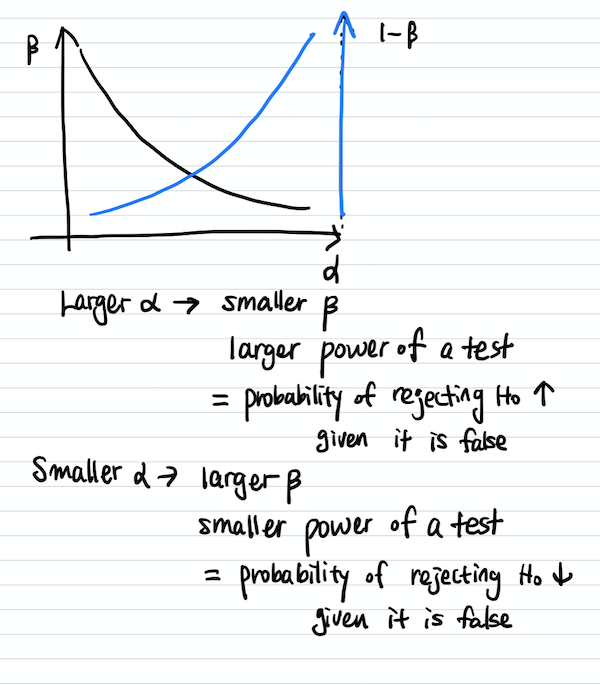

#### 5.3. The elements of the power of the test

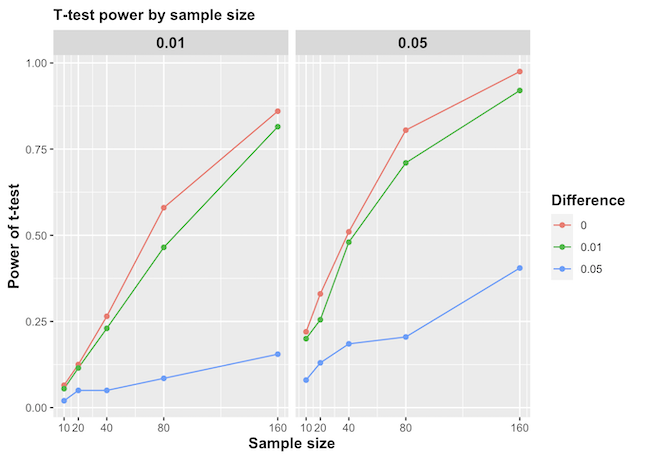

##### 5.3.1 Sample size

- Larger sample size -> larger the power of the test.

##### 5.3.2. Significance level

* Larger the significance level ($\alpha$) -> larger the power of the test.
    - This implies a test more prone to committing Type I error.

##### 5.3.3. Effect size

* A larger effect size -> larger power of the test

- Let's say we use Hedges' $g$ for the populations for which we want to make inference on their means:
$$g = \frac{\mid \bar{x}_1 - \bar{x}_2 \mid}{s_p}$$

- The effect size $g$ is a standardized measure of the magnitude of the difference we want to detect in our hypothesis testing.
- The term $s_p$ is the corresponding pooled standard deviation found in the sample.
- The effect size $g$ and `diff` (the difference between sample means) have a negative relationship:
    - when `diff` increases, the effect size $g$ decreases -> the power of the test decreases.

> This gradual power decrease with increasing `diff` happens because it is easier for the test to detect larger differences between `diff` and the real population diameter difference (i.e., 0.08). Once `diff` gets closer to the real population diameter difference, the blue curve for 𝐻0 moves more to the right-hand side closer to the red curve for 𝐻𝑎 (the real model with mean of 0.08). Therefore, **the area under the curve corresponding to the power of the test 1−𝛽 has a significant decrease**.

### 6. Use the 𝑝-value to correctly draw the hypothesis testing’s statistical conclusions.

> In statistics, the p-value is the probability of obtaining results at least as extreme as the observed results of a statistical hypothesis test, assuming that the null hypothesis is correct. [source](https://www.investopedia.com/terms/p/p-value.asp)

> Under our null hypothesis $H_0$, we would get the currently observed proportion of chocolate Timbits in `p_value`$\times 100\%$ of the samples due to chance. Moreover, the $\alpha = 0.05$ is our threshold to define whether we reject or fail to reject $H_0$, and we can see that `p_value` $> \alpha$. Hence, we fail to reject $H_0$.

- A 𝑝-value is not the probability of committing Type I error if it is smaller than 𝛼.
    - Rather, it means that the observed sample statistic is not occurred by chance under the null hypothesis distribution.
- Recall that all our conclusions in a hypothesis testing are drawn in regards to 𝐻0.
- Therefore, 𝑝-values are calculated assuming that 𝐻0 is true.
- A small 𝑝-value indicates that your observed test stastitic is highly unlikely under 𝐻0.